/media/data/Projects/hearai/pose_estimation/./test_files/geogeous hair style.jpg


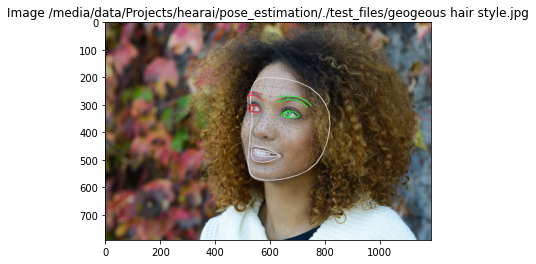

/media/data/Projects/hearai/pose_estimation/./test_files/header-asl-1-dimension.jpeg
Face landmarks have not been found.


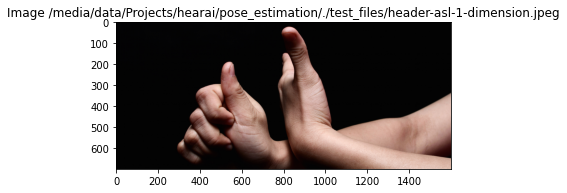

/media/data/Projects/hearai/pose_estimation/./test_files/Round-Faces-Hairstyles-V2-bb3d4ad87275459eb4c10088999a8221.png


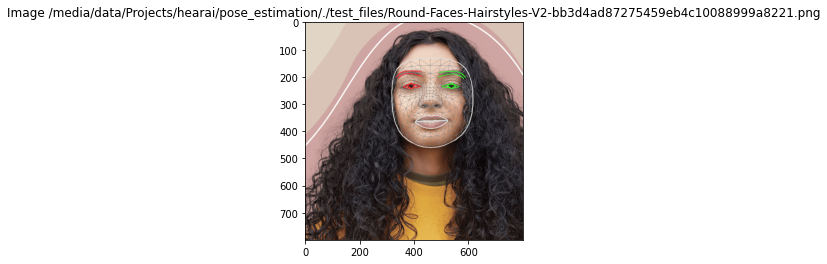

/media/data/Projects/hearai/pose_estimation/./test_files/pose_ballet_test.jpg
Face landmarks have not been found.


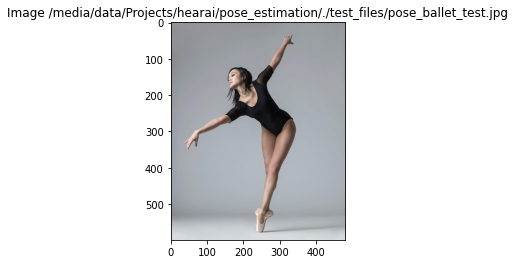

/media/data/Projects/hearai/pose_estimation/./test_files/TqoSJcwDLpk36suHVNe9yJ-320-80.jpg


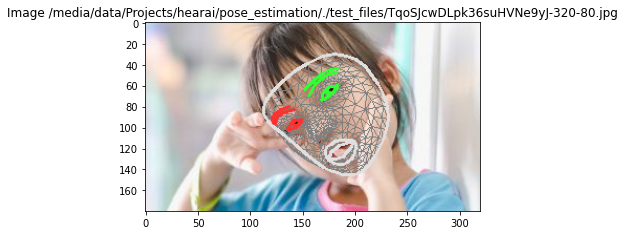

/media/data/Projects/hearai/pose_estimation/./test_files/face-touch.jpg


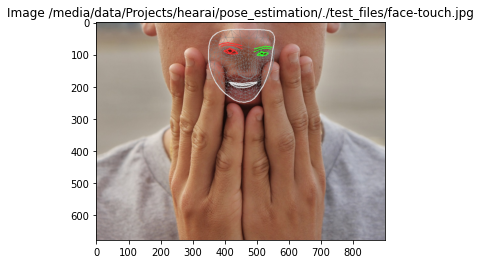

/media/data/Projects/hearai/pose_estimation/./test_files/images1.jpeg


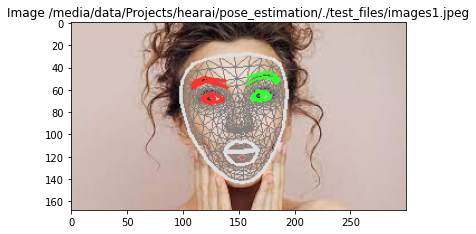

/media/data/Projects/hearai/pose_estimation/./test_files/TqoSJcwDLpk36suHVNe9yJ.jpg


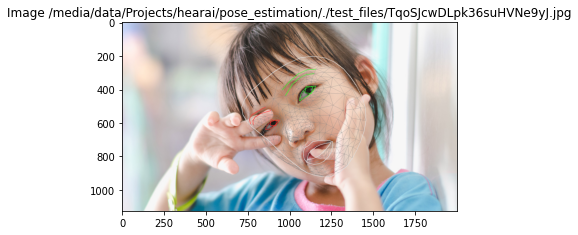

/media/data/Projects/hearai/pose_estimation/./test_files/2020_03_23_90362_1584944819._large.jpg


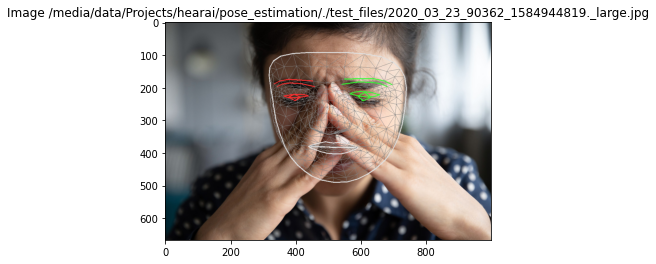

/media/data/Projects/hearai/pose_estimation/./test_files/9d5dbb894ed1236a95d634bb60e5c570.png


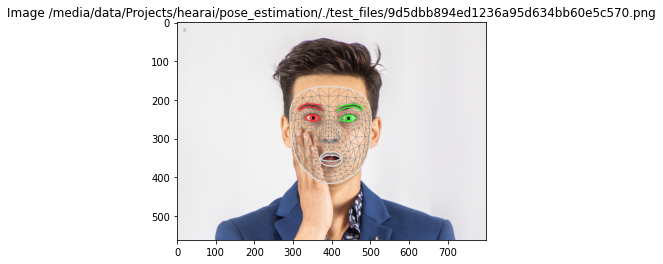

/media/data/Projects/hearai/pose_estimation/./test_files/images.jpeg


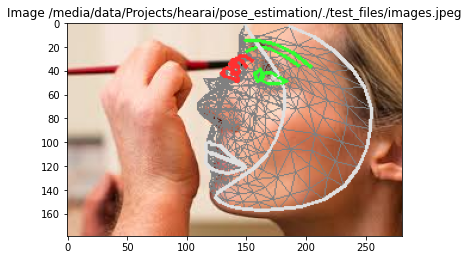

/media/data/Projects/hearai/pose_estimation/./test_files/_108643134_3130.jpg


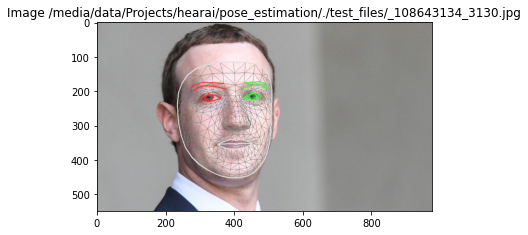

/media/data/Projects/hearai/pose_estimation/./test_files/images4.jpeg


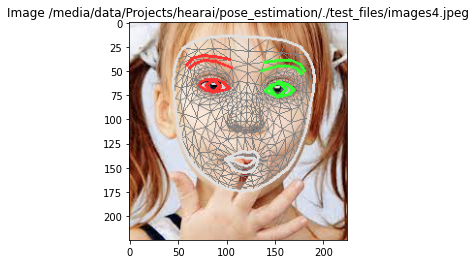

/media/data/Projects/hearai/pose_estimation/./test_files/Tpouching-your-face_1200x628-1200x610.jpg


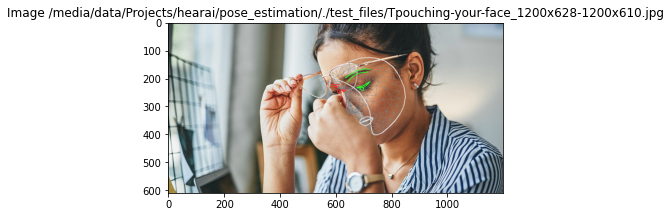

In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For static images:
test_files_dir = os.path.join(os.getcwd(), "./test_files")
IMAGE_FILES = [os.path.join(test_files_dir, f) for f in os.listdir(test_files_dir)]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    print(file)
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      print("Face landmarks have not been found.")
      plt.title('Image {name}'.format(name=file))
      plt.imshow(image[:,:,::-1])
      plt.show()
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    plt.title('Image {name}'.format(name=file))
    plt.imshow(annotated_image[:,:,::-1])
    plt.show()
    #cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
